#Etapa 1: Bibliotecas

In [ ]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 603.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 3.6 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.2.0-py3-none-any.whl size=158196 sha256=d2e9aae5cc94de66784c7611393c7cdd8eb8defc2ce41293f0224f430f926b77
  Stored in directory: /root/.cache/pip/wheels/5a/b5/4e/216953a1c711da55de29ed7ecf158b4a5bf32ef93d69ad66dd
Successfully built fugue-sql-antlr


In [ ]:
!pip install sktime[all_extras]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.0/745.0 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 11.2 MB/s eta 0:00:00
     ━━

In [ ]:
import pandas as pd
import datetime
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, mean_absolute_percentage_error

from statsforecast import StatsForecast
from statsforecast.models import Naive

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:25: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


#Etapa 2: Configuração padrão para os gráficos

In [ ]:
colors = cycler(color=plt.get_cmap("tab10").colors)  # ["b", "r", "g"]
# colors = cycler(color=["#282782", "r", "g"])

mpl.style.use("ggplot")
mpl.rcParams["figure.figsize"] = (20, 5)
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "lightgray"
mpl.rcParams["axes.prop_cycle"] = colors
mpl.rcParams["axes.linewidth"] = 1
mpl.rcParams["xtick.color"] = "black"
mpl.rcParams["ytick.color"] = "black"
mpl.rcParams["font.size"] = 12
mpl.rcParams["figure.titlesize"] = 25
mpl.rcParams["figure.dpi"] = 100

#Etapa 3: Leitura e tratamento da base

##Funções

In [ ]:
# Converter a data para um número ordinal
def convert_from_ordinal(x):
    return datetime.datetime.fromordinal(x)

# Converter um número ordinal para data
def convert_to_ordinal(x):
    return datetime.datetime.toordinal(x)

##Tratamento inicial da base

In [ ]:
# Leitura dos dados raw
dados = pd.read_csv( 'https://raw.githubusercontent.com/Trabalhinho/FIAP_Tech_Challenge/main/Bimestre_2/base_dados/dados_historicos_ibovespa.csv', sep = ',' )
dados.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,12.01.2024,130.988,130.652,131.927,130.410,"10,66M","0,26%"
1,11.01.2024,130.649,130.841,131.308,129.898,"9,76M","-0,15%"
2,10.01.2024,130.841,131.447,131.628,130.438,"8,96M","-0,46%"
3,09.01.2024,131.447,132.424,132.426,131.203,"9,29M","-0,74%"
4,08.01.2024,132.427,132.023,132.498,131.015,"8,50M","0,31%"


In [ ]:
# Tratamento do campo de data
dados['Data'] = pd.to_datetime( dados['Data'], format = '%d.%m.%Y' )
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1003 non-null   datetime64[ns]
 1   Último    1003 non-null   float64       
 2   Abertura  1003 non-null   float64       
 3   Máxima    1003 non-null   float64       
 4   Mínima    1003 non-null   float64       
 5   Vol.      1003 non-null   object        
 6   Var%      1003 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 55.0+ KB


In [ ]:
# Verificação de dados nulos
dados.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [ ]:
# Ajustes das colunas de Volume e Variação
dados['unidade_medida'] = [ x.strip()[-1] for x in dados['Vol.'] ]

dados['Vol.'] = dados['Vol.'].str[:-1]
dados['Vol.'] = dados['Vol.'].str.replace( ',', '.' )
dados['Vol.'] = pd.to_numeric( dados['Vol.'] )

dados['Var%'] = dados['Var%'].str[:-1]
dados['Var%'] = dados['Var%'].str.replace( ',', '.' )
dados['Var%'] = pd.to_numeric( dados['Var%'] )

dados.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,unidade_medida
0,2024-01-12,130.988,130.652,131.927,130.410,10.66,0.26,M
1,2024-01-11,130.649,130.841,131.308,129.898,9.76,-0.15,M
2,2024-01-10,130.841,131.447,131.628,130.438,8.96,-0.46,M
3,2024-01-09,131.447,132.424,132.426,131.203,9.29,-0.74,M
4,2024-01-08,132.427,132.023,132.498,131.015,8.50,0.31,M


In [ ]:
# Verificação da unidade_medida
dados['unidade_medida'].unique()

array(['M'], dtype=object)

In [ ]:
# Visto que há apenas a medida M, não precisaremos deste campo
dados.drop( 'unidade_medida', axis = 1, inplace = True )
dados.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2024-01-12,130.988,130.652,131.927,130.410,10.66,0.26
1,2024-01-11,130.649,130.841,131.308,129.898,9.76,-0.15
2,2024-01-10,130.841,131.447,131.628,130.438,8.96,-0.46
3,2024-01-09,131.447,132.424,132.426,131.203,9.29,-0.74
4,2024-01-08,132.427,132.023,132.498,131.015,8.50,0.31


In [ ]:
# Padronização dos nomes das colunas para trabalhar melhor
dados.columns = [ 'data', 'ultimo', 'abertura', 'maxima', 'minima', 'volume', 'variacao' ]
dados.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,2024-01-12,130.988,130.652,131.927,130.410,10.66,0.26
1,2024-01-11,130.649,130.841,131.308,129.898,9.76,-0.15
2,2024-01-10,130.841,131.447,131.628,130.438,8.96,-0.46
3,2024-01-09,131.447,132.424,132.426,131.203,9.29,-0.74
4,2024-01-08,132.427,132.023,132.498,131.015,8.50,0.31


##Leitura dos dados

In [ ]:
# Separando apenas a coluna de data e a coluna de fechamento para entender o comportamento da base
dados_fechamento = dados[ [ 'data', 'ultimo' ] ]
dados_fechamento.columns = [ 'ds', 'y' ]
dados_fechamento.set_index( 'ds', inplace = True )
dados_fechamento.head()

,y
ds,
2024-01-12,130.988
2024-01-11,130.649
2024-01-10,130.841
2024-01-09,131.447
2024-01-08,132.427


In [ ]:
round( dados_fechamento.describe(), 2 )

,y
count,1003.00
mean,110.03
std,11.63
min,63.57
25%,103.76
50%,111.74
75%,117.65
max,134.19


<Axes: xlabel='ds'>

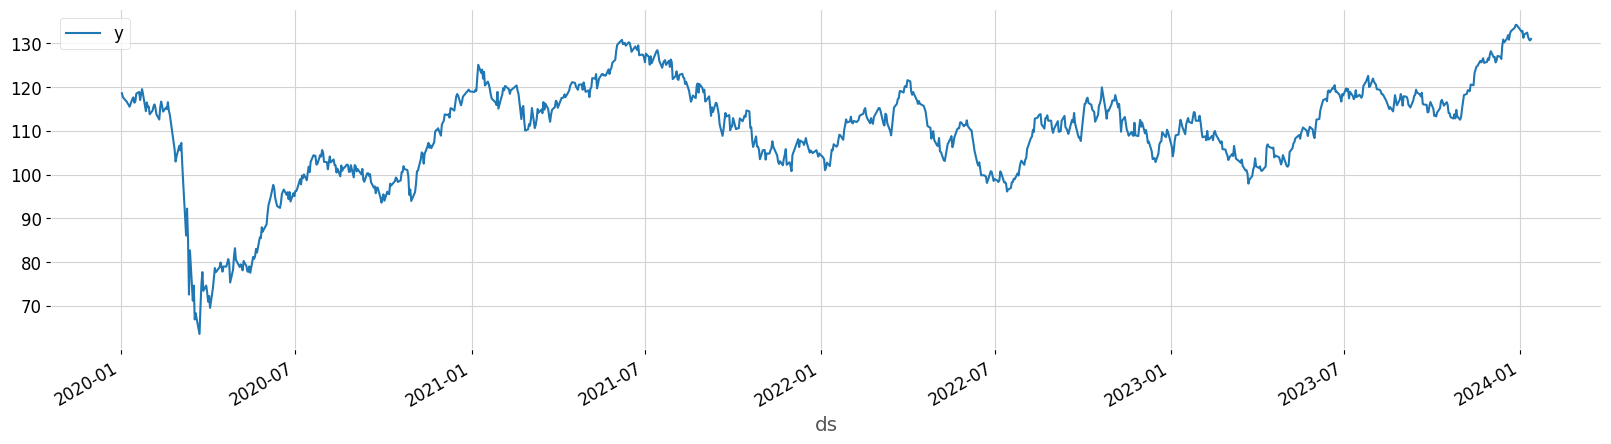

In [ ]:
dados_fechamento.plot()

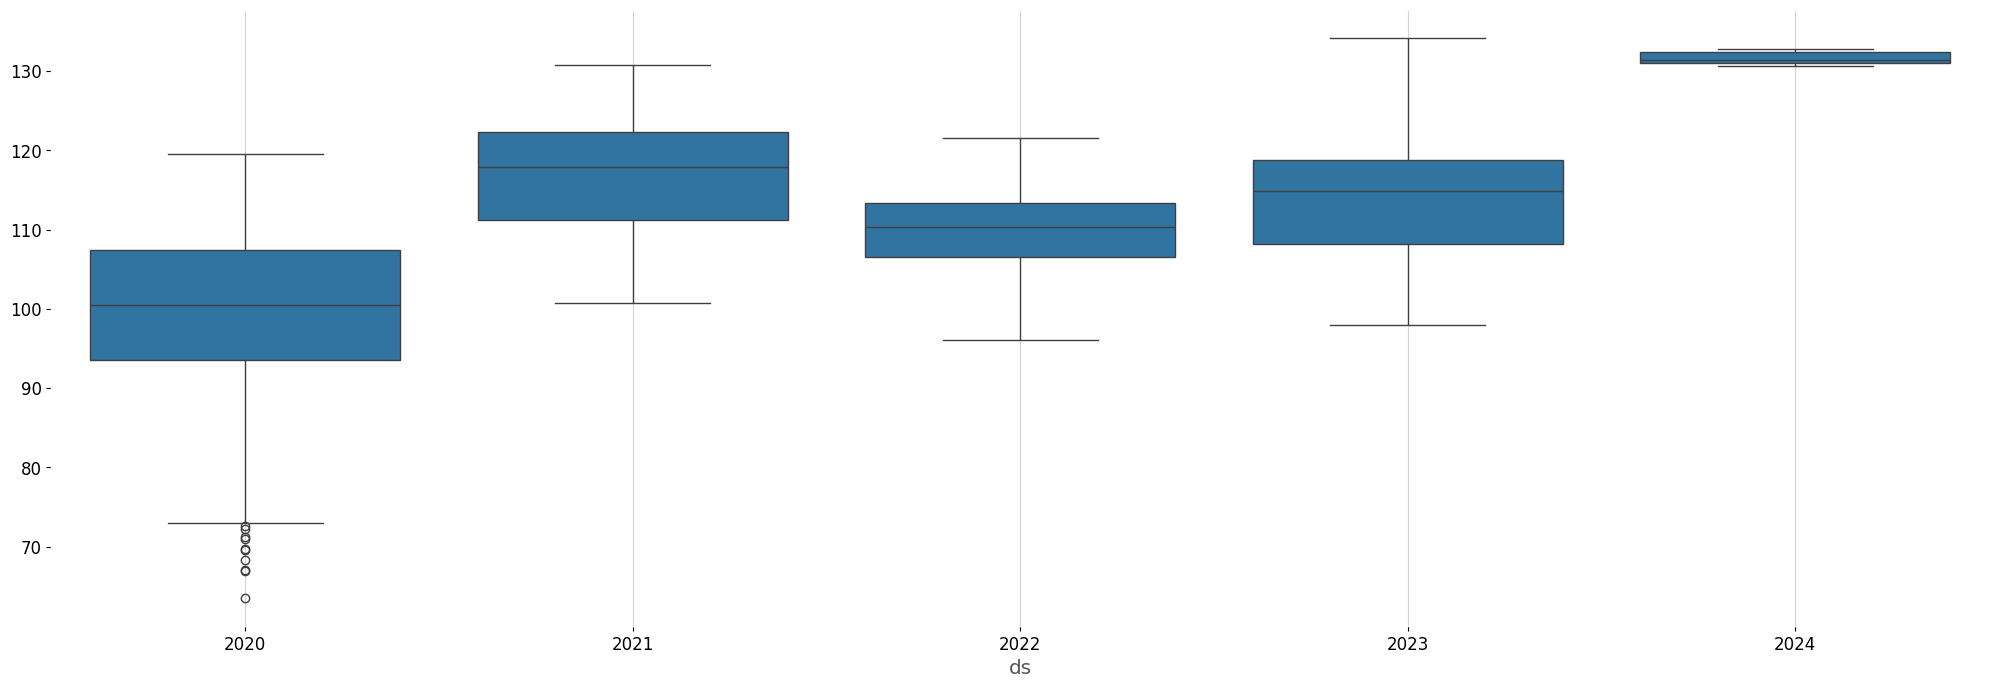

In [ ]:
_, ax = plt.subplots( figsize = ( 25, 8 ) )
sns.boxplot( x = dados_fechamento.index.year, y = dados_fechamento.values[:,0], ax = ax )
plt.grid()

In [ ]:
dados_fechamento.shape

(1003, 1)

#Etapa 4: Testes dos modelos de Machine Learning

##Modelos utilizando a biblioteca sktime

###Função geral

In [ ]:
# Função padrão para os modelos de sktime apresentado no vídeo abaixo:
# https://www.youtube.com/watch?v=oeo1IpLoSuw
#
# Link para o GitHub com o notebook:
# https://github.com/daveebbelaar/data-science-tutorials/tree/main

def sktime_forecast( dataset, horizon, forecaster, validation = False, confidence = 0.9, frequency = "D" ):
    """Loop over a time series dataframe, train an sktime forecasting model, and visualize the results.

    Args:
        dataset (pd.DataFrame): Input time series DataFrame with datetime index
        horizon (int): Forecast horizon
        forecaster (sktime.forecasting): Configured forecaster
        validation (bool, optional): . Defaults to False.
        confidence (float, optional): Confidence level. Defaults to 0.9.
        frequency (str, optional): . Defaults to "D".
    """

    # Adjust frequency
    forecast_df = dataset.resample( rule = frequency ).mean()

    # Interpolate missing periods (if any)
    forecast_df = forecast_df.interpolate( method = 'time' )

    for col in dataset.columns:

        # Use train/test split to validate forecaster
        if validation:
            df = forecast_df[col]

            y_train = df[:-horizon]
            y_test = df.tail( horizon )

            forecaster.fit( y_train )
            fh = ForecastingHorizon( y_test.index, is_relative = False )
            y_pred = forecaster.predict( fh )
            ci = forecaster.predict_interval( fh, coverage = confidence ).astype( 'float' )
            y_true = df.tail( horizon )

            print( 'Mean squared error (MSE): %.2f' % mean_squared_error( y_true, y_pred ) )
            print( 'Coefficients of determination (R^2): %.2f' % r2_score( y_true, y_pred ) )
            print( 'Mean absolute error (MAE): %.2f' % mean_absolute_error( y_true, y_pred ) )

        # Make predictions beyond the dataset
        if not validation:
            df = forecast_df[col].dropna()
            forecaster.fit(df)

            last_date = df.index.max()
            fh = ForecastingHorizon(
                pd.date_range( str( last_date ), periods = horizon, freq = frequency ),
                is_relative=False,
            )

            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval( fh, coverage = confidence ).astype( 'float' )
            mae = np.nan

        # Visualize results
        plt.plot(
            df.tail( horizon * 3 ),
            label = 'Actual',
            color = 'black',
        )
        #plt.gca().fill_between(
        #    ci.index, ( ci.iloc[:, 0] ), ( ci.iloc[:, 1] ), color = 'b', alpha = 0.1
        #)
        plt.plot( y_pred, label = 'Predicted' )
        # plt.title(
        #     f"{horizon} day forecast for {col} (mae: {round(mae, 2)}, confidence: {confidence*100}%)"
        # )
        #plt.ylim( bottom = 0 )
        plt.legend()
        plt.grid( True )
        plt.show()

###Dados

In [ ]:
# Separa os dados em um novo DataFrame para trabalharmos com a biblioteca sktime
dados_fechamento_sktime = dados[ [ 'data', 'ultimo' ] ]
dados_fechamento_sktime.set_index( 'data', inplace = True )

# Ajusta a ordem dos dados para as menores datas virem primeiro
dados_fechamento_sktime = dados_fechamento_sktime.iloc[::-1]

dados_fechamento_sktime = dados_fechamento_sktime.resample( rule = 'D' ).mean()
dados_fechamento_sktime = dados_fechamento_sktime.interpolate( method = 'time' )

dados_fechamento_sktime.head()

,ultimo
data,
2020-01-02,118.573000
2020-01-03,117.707000
2020-01-04,117.430667
2020-01-05,117.154333
2020-01-06,116.878000


###Modelo Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfg_brnj/kkgwyks1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfg_brnj/zx8zexnt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39052', 'data', 'file=/tmp/tmpbfg_brnj/kkgwyks1.json', 'init=/tmp/tmpbfg_brnj/zx8zexnt.json', 'output', 'file=/tmp/tmpbfg_brnj/prophet_modelkqx1emst/prophet_model-20240122015642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:56:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:56:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean squared error (MSE): 31.14
Coefficients of determination (R^2): 0.58
Mean absolute error (MAE): 4.53


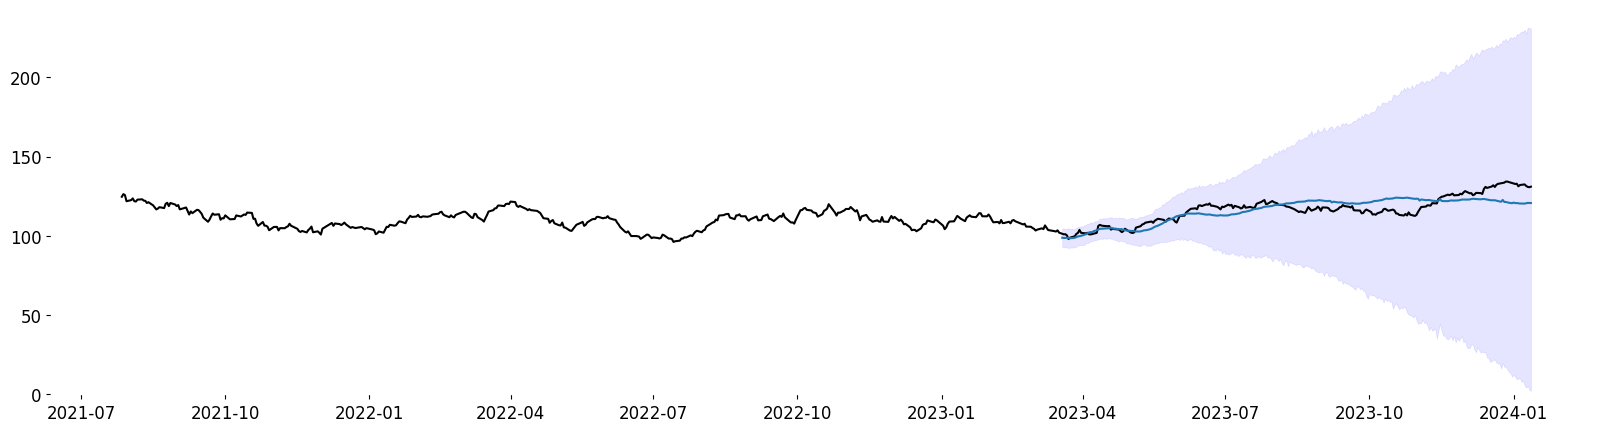

In [ ]:
# Realizando o teste do modelo Prophet

forecaster = Prophet( weekly_seasonality = True, alpha = 0.10, add_country_holidays = { 'country_name': 'Brazil' } )
sktime_forecast( dataset = dados_fechamento_sktime, horizon = 300, forecaster = forecaster, validation = True )

###Modelo AutoARIMA

Mean squared error (MSE): 125.52
Coefficients of determination (R^2): -1.59
Mean absolute error (MAE): 9.65


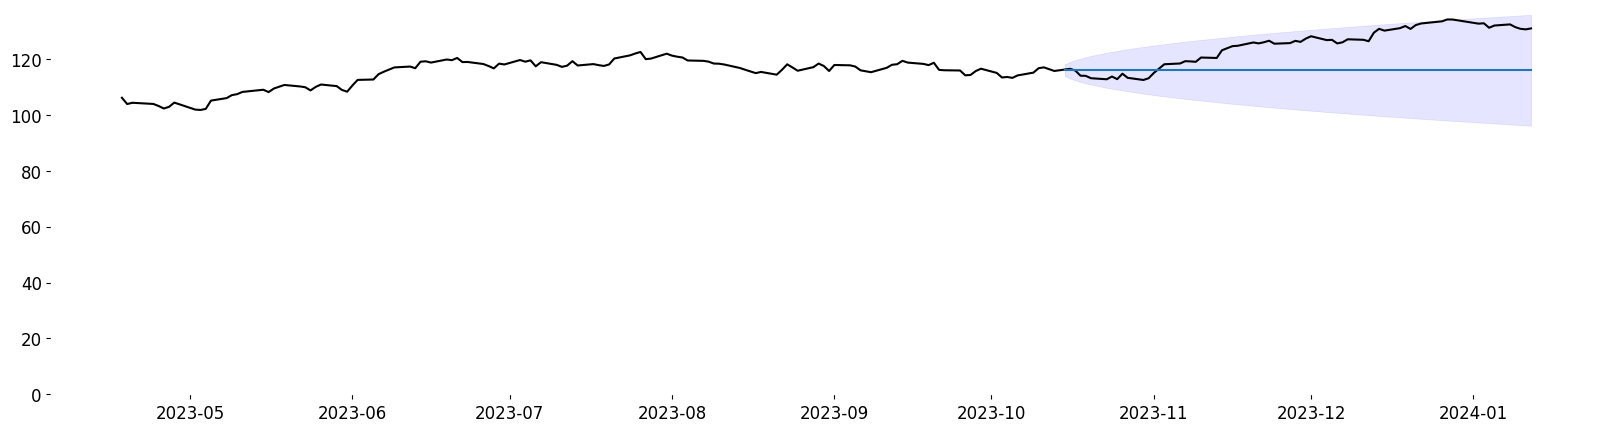

In [ ]:
# Realizando o teste do modelo AutoARIMA

forecaster = AutoARIMA(sp=1, suppress_warnings=True)
sktime_forecast( dataset = dados_fechamento_sktime, horizon = 90, forecaster = forecaster, validation = True )

###Modelo Theta Forecaster

Mean squared error (MSE): 121.82
Coefficients of determination (R^2): -1.51
Mean absolute error (MAE): 9.51


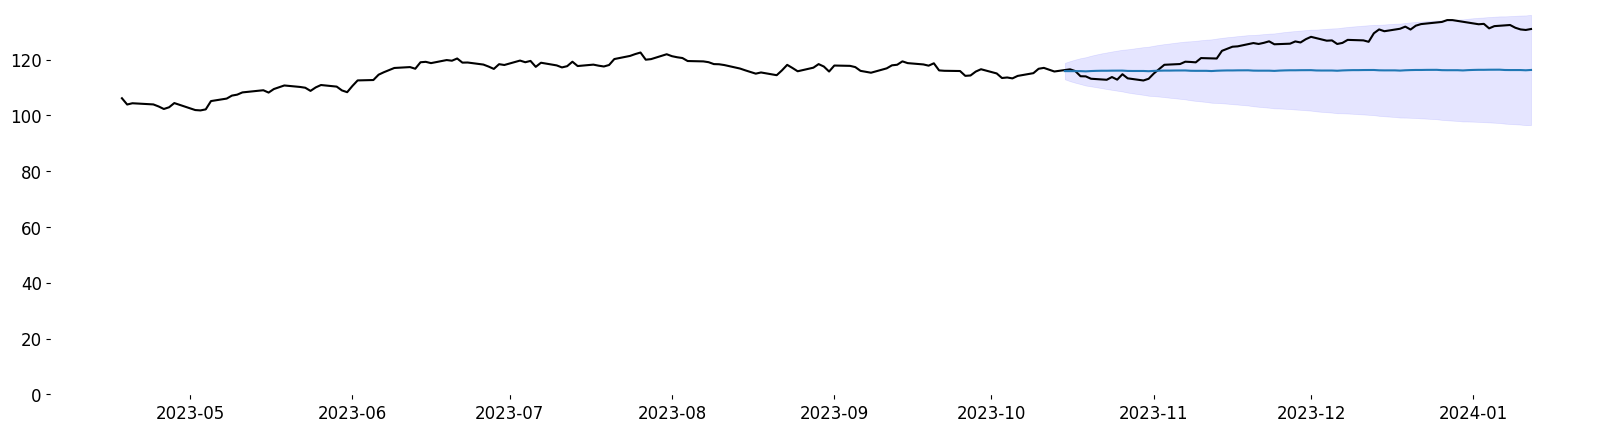

In [ ]:
# Realizando o teste do modelo Theta Forecaster

forecaster = ThetaForecaster( sp = 12 )
sktime_forecast( dataset = dados_fechamento_sktime, horizon = 90, forecaster = forecaster, validation = True )

###Modelo Naive Forecaster

Mean squared error (MSE): 127.64
Coefficients of determination (R^2): -1.63
Mean absolute error (MAE): 9.72


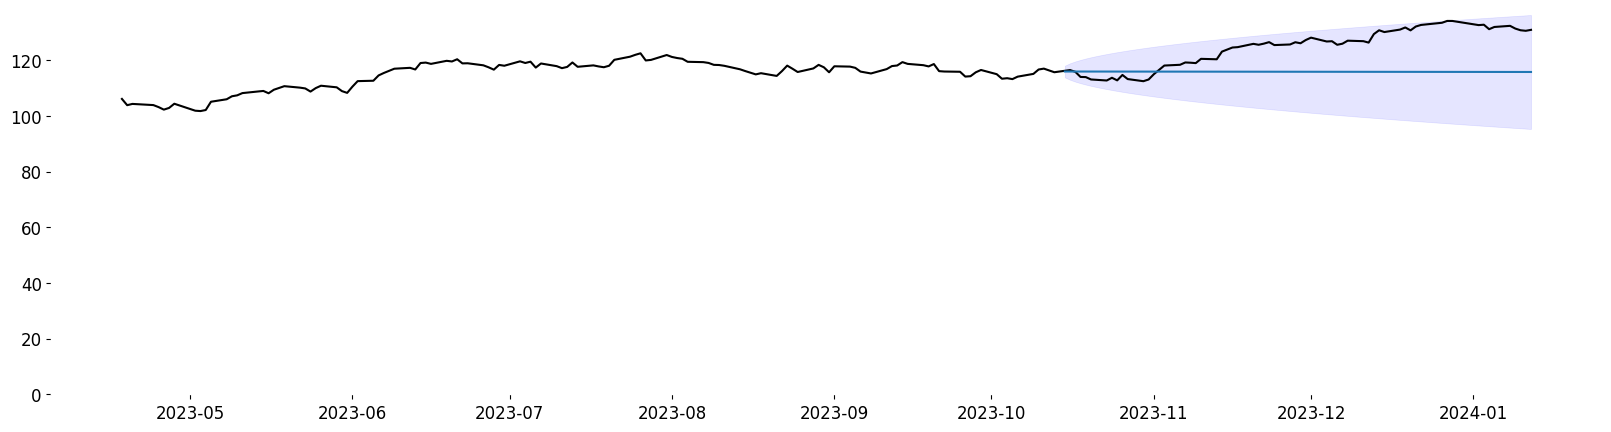

In [ ]:
# Realizando o teste do modelo Naive Forecaster com a estratégia "Drift"

forecaster = NaiveForecaster( strategy = "drift" )
sktime_forecast( dataset = dados_fechamento_sktime, horizon = 90, forecaster = forecaster, validation = True )

Mean squared error (MSE): 295.10
Coefficients of determination (R^2): -5.09
Mean absolute error (MAE): 15.70


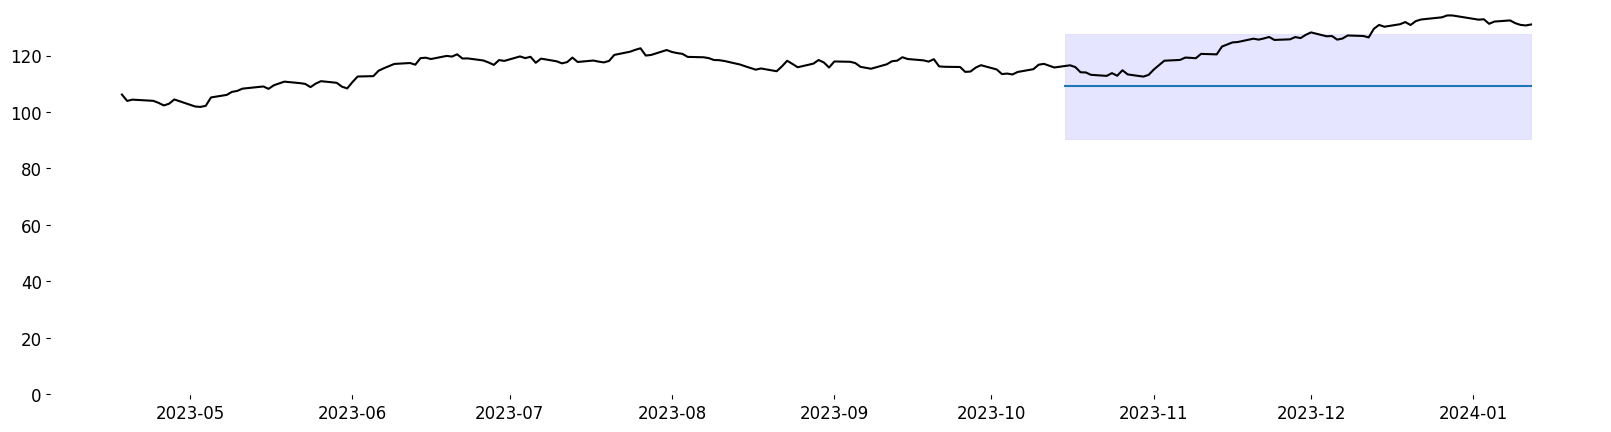

In [ ]:
# Realizando o teste do modelo Naive Forecaster com a estratégia "Mean"

forecaster = NaiveForecaster( strategy = "mean" )
sktime_forecast( dataset = dados_fechamento_sktime, horizon = 90, forecaster = forecaster, validation = True )

Mean squared error (MSE): 125.52
Coefficients of determination (R^2): -1.59
Mean absolute error (MAE): 9.65


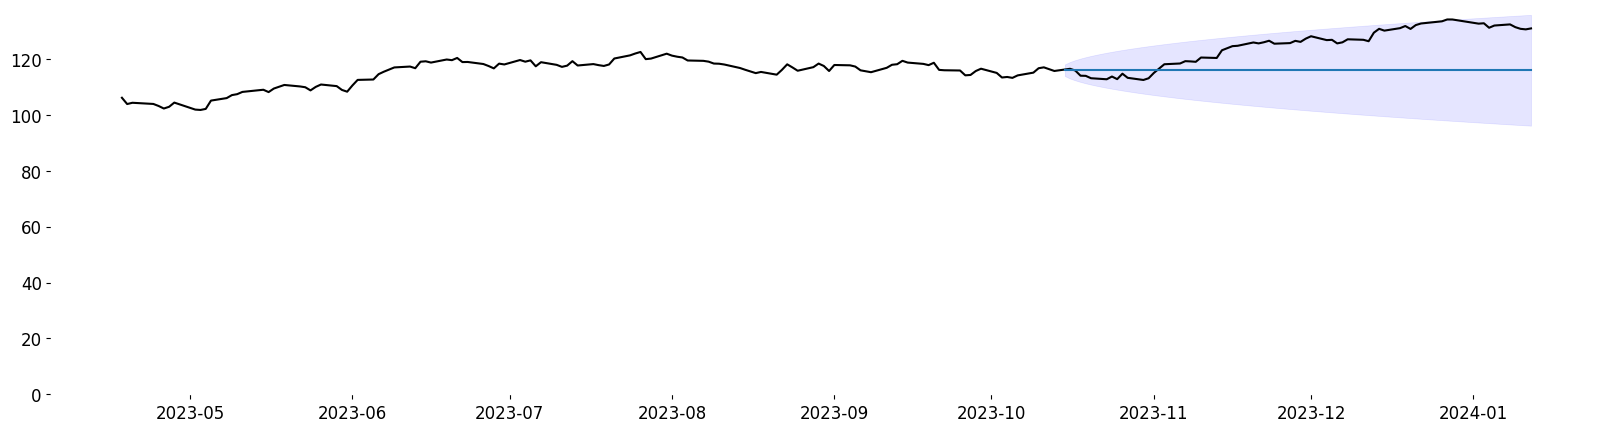

In [ ]:
# Realizando o teste do modelo Naive Forecaster com a estratégia "Last"

forecaster = NaiveForecaster( strategy = "last" )
sktime_forecast( dataset = dados_fechamento_sktime, horizon = 90, forecaster = forecaster, validation = True )

###Modelo Stats Forecast AutoARIMA

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:914: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:914: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:914: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:914: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:914: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:914: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:914: UserWarning: possible convergenc

Mean squared error (MSE): 213.22
Coefficients of determination (R^2): -3.40
Mean absolute error (MAE): 12.50


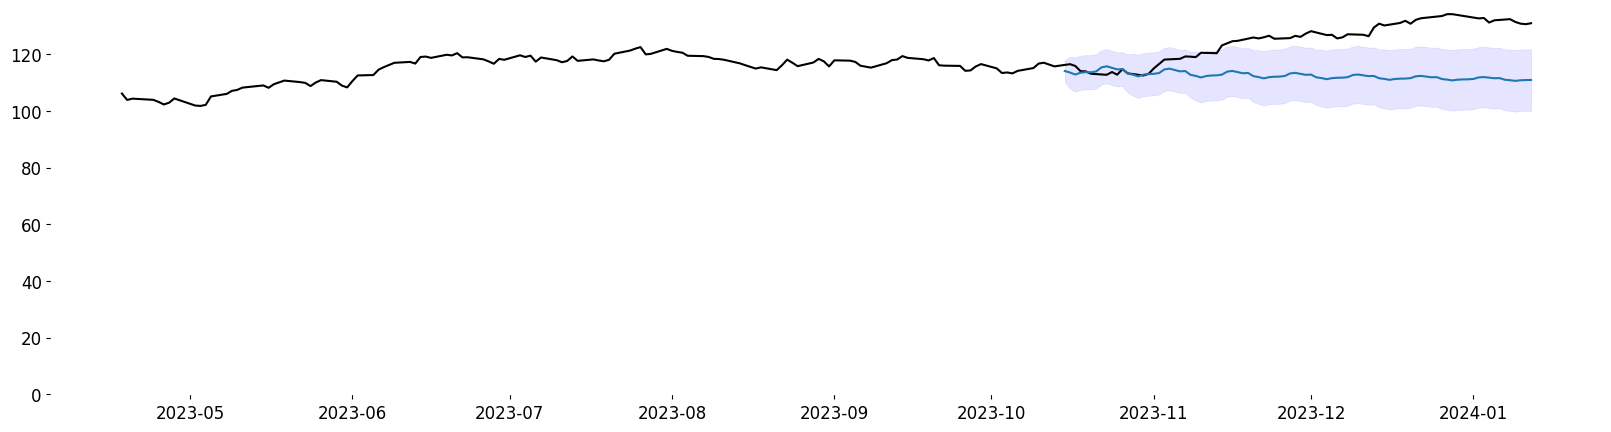

In [ ]:
# Realizando o teste do modelo Stats Forecaster AutoARIMA

forecaster = StatsForecastAutoARIMA( sp = 12, d = 0, max_p = 2, max_q = 2 )
sktime_forecast( dataset = dados_fechamento_sktime, horizon = 90, forecaster = forecaster, validation = True )

##Modelos utilizando a biblioteca sklearn

###Dados

In [ ]:
# Separa os dados que serão utilizados
dados_fechamento_sklearn = dados[ ['data', 'ultimo' ] ]

# Transforma a data em index
dados_fechamento_sklearn.set_index( 'data', inplace = True )

# Ajusta a ordem dos dados para as menores datas virem primeiro
dados_fechamento_sklearn = dados_fechamento_sklearn.iloc[::-1]

# Adjust frequency
dados_fechamento_sklearn = dados_fechamento_sklearn.resample( rule = 'D' ).mean()

# Interpolate missing periods (if any)
dados_fechamento_sklearn = dados_fechamento_sklearn.interpolate( method = 'time' )

# Mantém uma base de dados menor para realizar o treinamento
dados_fechamento_sklearn = dados_fechamento_sklearn.tail(100)

dados_fechamento_sklearn.head()

,ultimo
data,
2023-10-05,113.284000
2023-10-06,114.170000
2023-10-07,114.498667
2023-10-08,114.827333
2023-10-09,115.156000


In [ ]:
# Realiza o ajuste dos campos para realizar o treino e teste
x = dados_fechamento_sklearn.index.values.astype( 'float64' )
y = dados_fechamento_sklearn.iloc[:].values.astype( 'float64' )

x = x.reshape( -1, 1 )

In [ ]:
# Separação da base de treino e da base de teste
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, shuffle = True )

###Modelo de regressão linear (LR)

In [ ]:
# Atribui o modelo
modelo_LR = LinearRegression()

# Realiza o treinamento
modelo_LR.fit( x_train, y_train )

# Realiza o teste de predição
y_pred_LR = modelo_LR.predict( x_test )

# Calcula o desempenho do teste
print( 'Mean squared error (MSE): %.2f' % mean_squared_error( y_test, y_pred_LR ) )
print( 'Coefficients of determination (R^2): %.2f' % r2_score( y_test, y_pred_LR ) )
print( 'Mean absolute error (MAE): %.2f' % mean_absolute_error( y_test, y_pred_LR ) )
print( 'Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error( y_test, y_pred_LR ) )
print( 'Score test: %.2f' % modelo_LR.score( x_test, y_test ) )
print( 'Score train: %.2f' % modelo_LR.score( x_train, y_train ) )

Mean squared error (MSE): 3.34
Coefficients of determination (R^2): 0.93
Mean absolute error (MAE): 1.67
Mean absolute percentage error (MAPE): 0.01
Score test: 0.93
Score train: 0.89


###Modelo de Random Forest Regressor (RFR)

In [ ]:
# Atribui o modelo
modelo_RFR = RandomForestRegressor( n_estimators = 100, max_features = 3, random_state = 1 )

# Realiza o treinamento
modelo_RFR.fit( x_train, y_train )

# Realiza o teste de predição
y_pred_RFR = modelo_RFR.predict( x_test )

# Calcula o desempenho do teste
print( 'Mean squared error (MSE): %.2f' % mean_squared_error( y_test, y_pred_RFR ) )
print( 'Coefficients of determination (R^2): %.2f' % r2_score( y_test, y_pred_RFR ) )
print( 'Mean absolute error (MAE): %.2f' % mean_absolute_error( y_test, y_pred_RFR ) )
print( 'Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error( y_test, y_pred_LR ) )
print( 'Score test: %.2f' % modelo_LR.score( x_test, y_test ) )
print( 'Score train: %.2f' % modelo_LR.score( x_train, y_train ) )

<ipython-input-39-d6948b1a229e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_RFR.fit( x_train, y_train )


Mean squared error (MSE): 1.06
Coefficients of determination (R^2): 0.97
Mean absolute error (MAE): 0.73
Mean absolute percentage error (MAPE): 0.01
Score test: 0.88
Score train: 0.90


#Etapa 5: Forecasting

##Modelo Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfg_brnj/qo7bgy0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfg_brnj/uv7_usov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35405', 'data', 'file=/tmp/tmpbfg_brnj/qo7bgy0y.json', 'init=/tmp/tmpbfg_brnj/uv7_usov.json', 'output', 'file=/tmp/tmpbfg_brnj/prophet_modeln7k5pyxa/prophet_model-20240122022640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:26:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:26:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


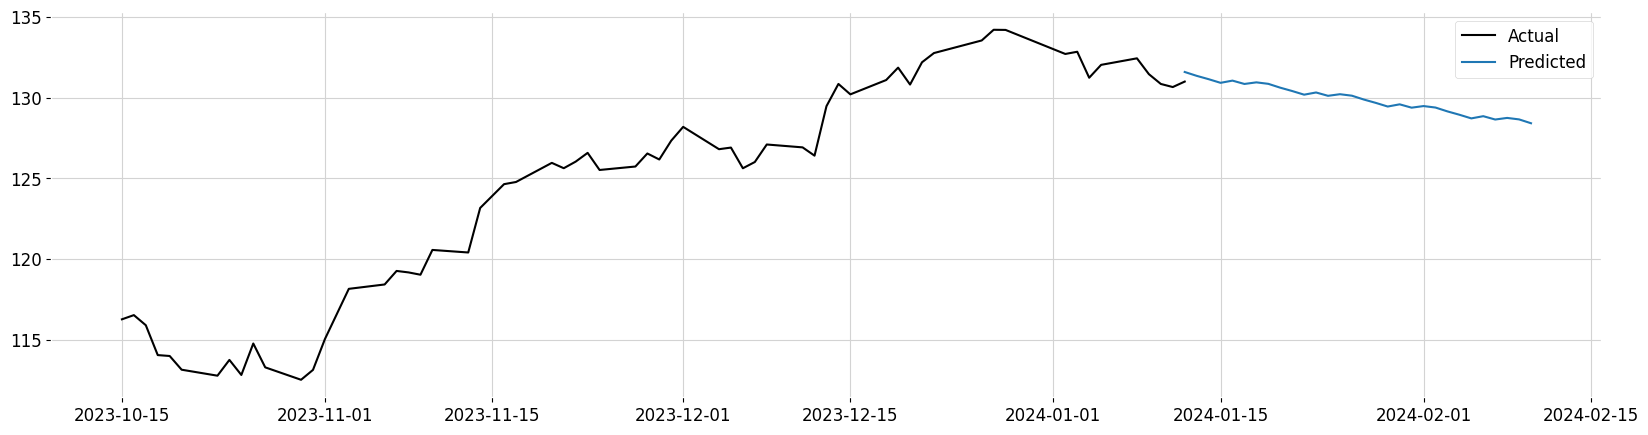

In [ ]:
# Realizando o forecasting com o modelo Prophet

# Separando uma pequena parte da base para fazer o forecasting
dados_fechamento_final = dados_fechamento_sktime.tail(100)

# Utilizando a função para gerar os dados de forecasting
forecaster = Prophet( weekly_seasonality = True )
sktime_forecast( dataset = dados_fechamento_final, horizon = 30, forecaster = forecaster, validation = False )

##Modelo de regressão linear (LR)

In [ ]:
# Realizando o forecasting com o modelo de regressão linear (LR)

# Identificando a data máxima da base
last_date = dados_fechamento_sklearn.index.values.max()

# Gerando as datas que serão preditas
fh = pd.date_range( str( last_date ), periods = 30, freq = 'D' ).values.astype( 'float64' )
fh = fh.reshape( -1, 1 )

# Executando o modelo de predição
y_pred_future = modelo_LR.predict( fh )

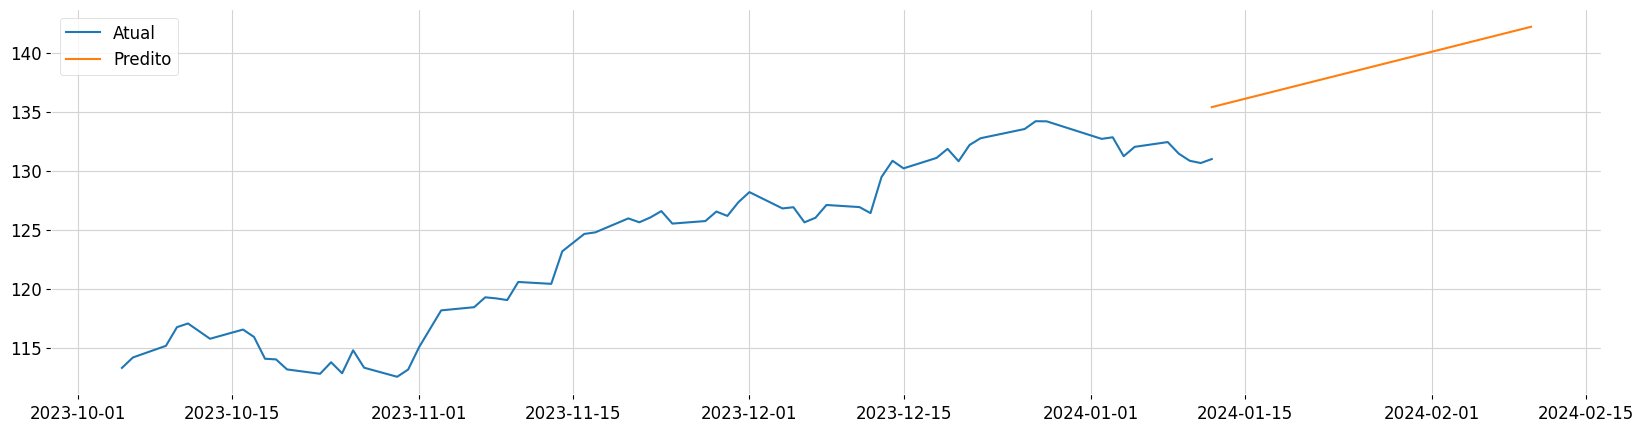

In [ ]:
# Gerando o gráfico final
dados_historicos = dados_fechamento_sklearn.copy()
dados_historicos.reset_index( inplace = True )
plt.plot( dados_historicos['data'], dados_historicos['ultimo'], label = 'Atual' )
plt.plot( fh.astype('datetime64[ns]'), y_pred_future, label = 'Predito' )
plt.legend()

##Modelo de Random Forest Regressor (RFR)

In [ ]:
# Realizando o forecasting com o modelo de regressão linear (LR)

# Identificando a data máxima da base
last_date = dados_fechamento_sklearn.index.values.max()

# Gerando as datas que serão preditas
fh = pd.date_range( str( last_date ), periods = 30, freq = 'D' ).values.astype( 'float64' )
fh = fh.reshape( -1, 1 )

# Executando o modelo de predição
y_pred_future = modelo_RFR.predict( fh )

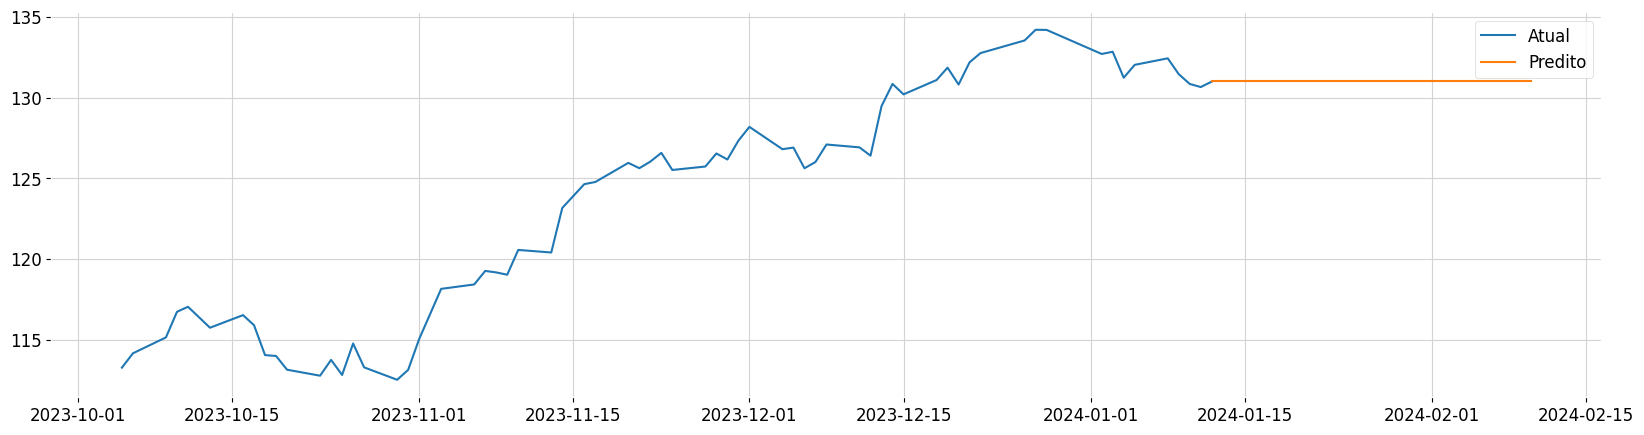

In [ ]:
# Gerando o gráfico final
dados_historicos = dados_fechamento_sklearn.copy()
dados_historicos.reset_index( inplace = True )
plt.plot( dados_historicos['data'], dados_historicos['ultimo'], label = 'Atual' )
plt.plot( fh.astype('datetime64[ns]'), y_pred_future, label = 'Predito' )
plt.legend()

#Etapa 6: Escolha do modelo ideal

Com os testes e a predição realizados, podemos afirmar que o Random Forest Regressor (RFR), apesar dos melhores resultados de teste, não apresenta uma predição realista, pois é uma reta que não aumenta ou diminui o valor.

Nosso segundo melhor em resultados de teste é o de Regressão Linear (LR). Nele podemos ver uma diferença quando comparado ao RFR: apesar de ser uma reta, seu valor está aumentando com o tempo. Isso o torna mais crível, pois indica que a bolsa de valores tende a crescer com o tempo.

Nosso terceiro melhor modelo em resultados de teste é o Prophet. Apesar de seus testes ficarem com valores ruins quando submetido aos validadores, a sua predição é a que mais condiz com a realidade.

Portanto, entendemos que o melhor modelo seria o de Regressão Linear (LR) e, em segundo, o modelo Prophet.